## Comparing inter-attribute logical dependencies of synthetic data generated by state-of-the art generative models with respect to benchmark data
- Load benchmark data and synthetic data generated by six generative models
- Apply Q_function on benchmark and synthetic data to check the inter-attribute logical dependencies (only for categorical features)
- Extract inter-attribute logical dependencies of benchmark and synthetic data based on Q_scores
- If Q_score for a particular pair of features is 0, then those features are functionally dependent; if Q_score is 1, then they are independent of each other, and if Q_score lies between 0 and 1, then those feature pairs are logically dependent
- All the functions related to this notebook are in the file Functions.py 

#### At the end, the total number of logical dependencies present in both the benchmark and synthetic data is displayed for each model, along with the percentage of preserved logical dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from Functions import *

## Benchmark_data

In [2]:
data = pd.read_csv('Benchmark_data/test_check.csv')

In [3]:
data.columns

Index(['patient_ids', 'age', 'gender', 'Feature_A', 'Feature_B', 'Feature_C',
       'Feature_D', 'Feature_E'],
      dtype='object')

In [4]:
data.shape

(100, 8)

In [5]:
categorical_features = ['gender', 'Feature_A', 'Feature_B', 'Feature_C', 'Feature_D','Feature_E']

For fourth case:
- categorical_features = ['gender', 'Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E','Feature_F', 'Feature_G', 'Feature_H','Feature_I', 'Feature_J', 'Feature_K', 'Feature_L']

In [6]:
check_categories(data, categorical_features)

There are no features with same entries


In [7]:
len(categorical_features)

6

### If any duplicate entries in the synthetic data remove them

## Synthetic_data generated by CTGAN

In [8]:
ctgan_syn_data = pd.read_csv('Synthetic_data/ctgan/synthetic_ctgan_test_check_dependent_mapping.csv')
ctgan_syn_data = ctgan_syn_data.drop_duplicates()

In [9]:
ctgan_syn_data.shape

(99, 8)

In [10]:
check_categories(ctgan_syn_data, categorical_features)

There are no features with same entries


In [11]:
ctgan_syn_data

,patient_ids,age,gender,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E
0,49,76,Female,Low,class_0,No,Med_B,absent
1,37,79,Male,Normal,class_1,Yes,Med_C,present
2,86,55,Male,Normal,class_1,Yes,Med_C,present
3,100,45,Female,Low,class_0,No,Med_A,absent
4,100,58,Female,Low,class_0,No,Med_A,absent
...,...,...,...,...,...,...,...,...
94,73,52,Female,Normal,class_1,Yes,Med_C,present
95,9,53,Female,High,class_2,Yes,Med_D,present
96,20,71,Female,Normal,class_1,Yes,Med_E,present
97,64,40,Male,Normal,class_1,Yes,Med_C,present


## Synthetic_data generated by CTABGAN+

In [12]:
ctabgan_plus_syn_data = pd.read_csv('Synthetic_data/ctabgan+/synthetic_ctabgan+_test_check_dependent_mapping.csv')
ctabgan_plus_syn_data = ctabgan_plus_syn_data.drop_duplicates()

In [13]:
ctabgan_plus_syn_data.shape

(100, 8)

In [14]:
check_categories(ctabgan_plus_syn_data, categorical_features)

There are no features with same entries


In [15]:
ctabgan_plus_syn_data

,patient_ids,age,gender,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E
0,83,61,Female,Low,class_0,No,Med_A,absent
1,73,34,Male,High,class_2,Yes,Med_D,present
2,27,24,Female,Normal,class_1,Yes,Med_C,present
3,76,61,Male,Normal,class_1,Yes,Med_C,present
4,89,72,Male,High,class_2,Yes,Med_D,present
...,...,...,...,...,...,...,...,...
95,42,43,Female,Low,class_0,No,Med_A,absent
96,35,49,Female,Low,class_0,No,Med_A,absent
97,96,56,Female,Low,class_0,No,Med_B,absent
98,39,29,Male,Low,class_0,No,Med_A,absent


## Synthetic_data generated by TVAE

In [16]:
tvae_syn_data = pd.read_csv('Synthetic_data/tvae/synthetic_tvae_test_check_dependent_mapping.csv')
tvae_syn_data = tvae_syn_data.drop_duplicates()

In [17]:
tvae_syn_data.shape

(99, 8)

### If check_categories function returns any features, then they have same values for all rows (mode collapse in TVAE)

In [18]:
check_categories(tvae_syn_data, categorical_features)

For column Feature_C
1
For column Feature_E
1
There are no features with same entries


In [19]:
tvae_syn_data

,patient_ids,age,gender,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E
0,60,72,Male,High,class_2,Yes,Med_D,present
1,70,69,Female,High,class_2,Yes,Med_D,present
2,68,79,Female,High,class_2,Yes,Med_D,present
3,75,58,Male,High,class_2,Yes,Med_D,present
4,2,71,Female,Normal,class_1,Yes,Med_C,present
...,...,...,...,...,...,...,...,...
94,81,58,Female,Normal,class_1,Yes,Med_C,present
95,73,70,Female,High,class_2,Yes,Med_D,present
96,62,60,Female,Normal,class_1,Yes,Med_E,present
97,84,72,Male,High,class_2,Yes,Med_A,present


## Synthetic_data generated by NextConvGen

In [20]:
nextconvgen_syn_data = pd.read_csv('Synthetic_data/nextconvgen/synthetic_nextconvgen_test_check_dependent_mapping.csv')
nextconvgen_syn_data = nextconvgen_syn_data.drop_duplicates()

In [21]:
nextconvgen_syn_data.shape

(99, 8)

In [22]:
nextconvgen_syn_data

,patient_ids,age,gender,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E
0,61,77,Male,Low,class_0,No,Med_A,absent
1,46,79,Male,High,class_2,Yes,Med_D,present
2,47,79,Male,Low,class_0,No,Med_B,absent
3,48,75,Male,High,class_2,Yes,Med_D,present
4,53,76,Male,Low,class_0,No,Med_A,absent
...,...,...,...,...,...,...,...,...
94,56,23,Female,High,class_2,Yes,Med_D,present
95,59,38,Female,Normal,class_1,Yes,Med_C,present
96,67,37,Female,Low,class_0,No,Med_A,absent
97,59,36,Female,Normal,class_1,Yes,Med_E,present


In [23]:
nextconvgen_syn_data['patient_ids'] = nextconvgen_syn_data['patient_ids'].round().astype(int)
nextconvgen_syn_data['age'] = nextconvgen_syn_data['age'].round().astype(int)

In [24]:
check_categories(nextconvgen_syn_data, categorical_features)

There are no features with same entries


In [25]:
nextconvgen_syn_data

,patient_ids,age,gender,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E
0,61,77,Male,Low,class_0,No,Med_A,absent
1,46,79,Male,High,class_2,Yes,Med_D,present
2,47,79,Male,Low,class_0,No,Med_B,absent
3,48,75,Male,High,class_2,Yes,Med_D,present
4,53,76,Male,Low,class_0,No,Med_A,absent
...,...,...,...,...,...,...,...,...
94,56,23,Female,High,class_2,Yes,Med_D,present
95,59,38,Female,Normal,class_1,Yes,Med_C,present
96,67,37,Female,Low,class_0,No,Med_A,absent
97,59,36,Female,Normal,class_1,Yes,Med_E,present


## Synthetic_data generated by TabuLa

In [26]:
tabula_syn_data = pd.read_csv('Synthetic_data/tabula/synthetic_tabula_test_check_dependent_mapping.csv')
tabula_syn_data.duplicated().sum()

0

In [27]:
tabula_syn_data = tabula_syn_data.drop_duplicates()
tabula_syn_data['patient_ids'] = tabula_syn_data['patient_ids'].round().astype(int)

In [28]:
tabula_syn_data

,patient_ids,age,gender,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E
0,64,42.0,Male,Normal,class_1,Yes,Med_C,present
1,3,46.0,Female,Normal,class_1,Yes,Med_E,present
2,28,19.0,Female,High,class_2,Yes,Med_A,present
3,23,19.0,Female,Low,class_0,No,Med_A,absent
4,74,45.0,Male,Normal,class_1,Yes,Med_C,present
...,...,...,...,...,...,...,...,...
60,63,21.0,Male,Low,class_0,No,Med_A,absent
61,80,25.0,Female,High,class_2,Yes,Med_D,present
62,7,78.0,Female,Low,class_0,No,Med_A,absent
63,39,44.0,Female,High,class_2,Yes,Med_D,present


In [29]:
check_categories(tabula_syn_data, categorical_features)

There are no features with same entries


## Synthetic_data generated by GReaT

In [30]:
great_syn_data = pd.read_csv('Synthetic_data/great/synthetic_great_test_check_dependent_mapping.csv')
print(great_syn_data.shape)
great_syn_data.duplicated().sum()

(100, 8)


0

In [31]:
great_syn_data = great_syn_data.drop_duplicates()
great_syn_data['patient_ids'] = great_syn_data['patient_ids'].round().astype(int)

In [32]:
great_syn_data

,patient_ids,age,gender,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E
0,43,56.0,Female,High,class_2,Yes,Med_A,present
1,72,32.0,Female,Normal,class_1,Yes,Med_E,present
2,76,67.0,Female,Normal,class_1,Yes,Med_C,present
3,70,52.0,Male,Normal,class_1,Yes,Med_E,present
4,76,77.0,Male,Normal,class_1,Yes,Med_E,present
...,...,...,...,...,...,...,...,...
95,67,78.0,Male,Normal,class_1,Yes,Med_C,present
96,87,33.0,Female,Normal,class_1,Yes,Med_C,present
97,75,79.0,Male,High,class_2,Yes,Med_D,present
98,77,74.0,Female,Normal,class_1,Yes,Med_E,present


In [33]:
check_categories(great_syn_data, categorical_features)

There are no features with same entries


## Q_score calculation for benchmark and synthetic data
- Identify logical dependencies in benchmark and synthetic data using Q_metric function and compare whether they are same or not
- For each feature pair, we will get Q_scores for both benchmark and synthetic. Plot them using feature_pair_plot function to see the common dependencies (located on diagonal line)
### Q_scores of benchmark data

In [34]:
Q_metric_real = Q_metric(data, categorical_features)

Functional dependency: Feature_A -> Feature_B
Functional dependency: Feature_A -> Feature_C
Functional dependency: Feature_A -> Feature_E
Functional dependency: Feature_B -> Feature_A
Functional dependency: Feature_B -> Feature_C
Functional dependency: Feature_B -> Feature_E
Functional dependency: Feature_C -> Feature_E
Functional dependency: Feature_E -> Feature_C
There are some logical dependencies in the data.


## Histogram of Q_scores for benchmark data
- For any given data, distibution of Q_scores helps in identifying the presence of dependencies 

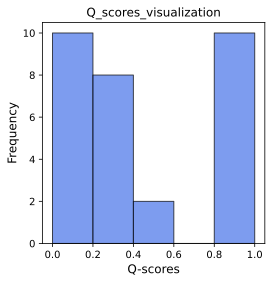

In [35]:
## defining colors
custom_palette = {
    0: (70/255, 114/255, 232/255),   # GoogleBlue
    1: (76/255, 150/255, 77/255),     # GoogleGreen
    2: (238/255, 179/255, 62/255)     # GoogleOrange
}

# Specify the bin edges to include values from 0.0 to 1.0
bin_edges = np.arange(0.0, 1.1, 0.2)

Q_metric_real = [round(value, 2) for value in Q_metric_real]
# Create a histogram with custom bin edges

# Set the figure size
plt.figure(figsize=(4, 4))  # Adjust width and height as needed
plt.hist(Q_metric_real, bins=bin_edges, edgecolor='black',align='mid',color=custom_palette[0],alpha=0.7)

# Add labels and title
plt.xlabel('Q-scores',fontname='DejaVu Sans', fontsize=12)
plt.ylabel('Frequency',fontname='DejaVu Sans', fontsize=12)
plt.title('Q_scores_visualization',fontname='DejaVu Sans', fontsize=12)

# Set x-axis ticks to include values from 0.0 to 1.0
plt.xticks(bin_edges)

# Show the plot
#plt.savefig('airbnb.png', dpi=300, bbox_inches='tight')
plt.show()


## Q_scores of synthetic data generated by CTGAN 

In [36]:
Q_metric_ctgan = Q_metric(ctgan_syn_data, categorical_features)

Functional dependency: Feature_A -> Feature_B
Functional dependency: Feature_A -> Feature_C
Functional dependency: Feature_A -> Feature_E
Functional dependency: Feature_B -> Feature_A
Functional dependency: Feature_B -> Feature_C
Functional dependency: Feature_B -> Feature_E
Functional dependency: Feature_C -> Feature_E
Functional dependency: Feature_E -> Feature_C
There are some logical dependencies in the data.


KL Divergence score is: 1.6666668043422852e-10


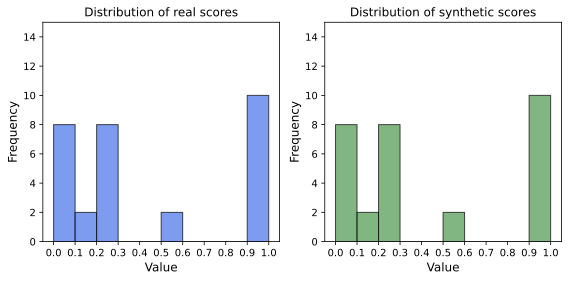

In [37]:
plot_scores(Q_metric_real,Q_metric_ctgan)

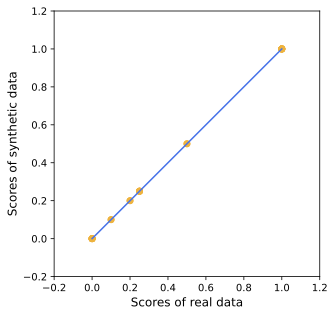

In [38]:
feature_pair_plot(Q_metric_real, Q_metric_ctgan)

## Q_scores of synthetic data genearted by CTABGAN 

Q_metric_ctabgan = Q_metric(ctabgan_syn_data, categorical_features)

plot_scores(Q_metric_real,Q_metric_ctabgan)

feature_pair_plot(Q_metric_real, Q_metric_ctabgan)

## Q_scores of synthetic data genearted by CTABGAN+

In [39]:
Q_metric_ctabgan_plus = Q_metric(ctabgan_plus_syn_data, categorical_features)

Functional dependency: Feature_A -> Feature_B
Functional dependency: Feature_A -> Feature_C
Functional dependency: Feature_A -> Feature_E
Functional dependency: Feature_B -> Feature_A
Functional dependency: Feature_B -> Feature_C
Functional dependency: Feature_B -> Feature_E
Functional dependency: Feature_C -> Feature_E
Functional dependency: Feature_E -> Feature_C
There are some logical dependencies in the data.


KL Divergence score is: 1.6666668043422852e-10


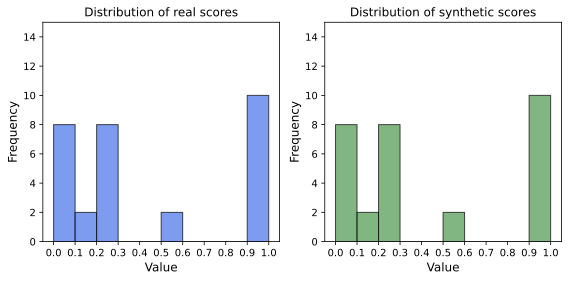

In [40]:
plot_scores(Q_metric_real,Q_metric_ctabgan_plus)

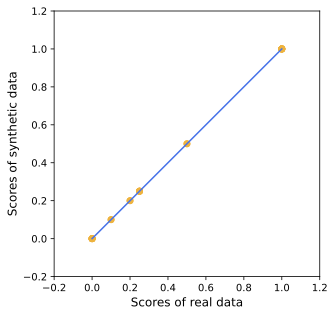

In [41]:
feature_pair_plot(Q_metric_real, Q_metric_ctabgan_plus)

## Q_scores of synthetic data genearted by TVAE

In [42]:
Q_metric_tvae = Q_metric(tvae_syn_data, categorical_features)

gender Feature_C
Functional dependency: gender -> Feature_C
gender Feature_E
Functional dependency: gender -> Feature_E
Functional dependency: Feature_A -> Feature_B
Feature_A Feature_C
Functional dependency: Feature_A -> Feature_C
Feature_A Feature_E
Functional dependency: Feature_A -> Feature_E
Functional dependency: Feature_B -> Feature_A
Feature_B Feature_C
Functional dependency: Feature_B -> Feature_C
Feature_B Feature_E
Functional dependency: Feature_B -> Feature_E
Feature_C Feature_E
Functional dependency: Feature_C -> Feature_E
Functional dependency: Feature_D -> Feature_A
Functional dependency: Feature_D -> Feature_B
Feature_D Feature_C
Functional dependency: Feature_D -> Feature_C
Feature_D Feature_E
Functional dependency: Feature_D -> Feature_E
Feature_E Feature_C
Functional dependency: Feature_E -> Feature_C
There are some logical dependencies in the data.


KL Divergence score is: 8.674855414601806


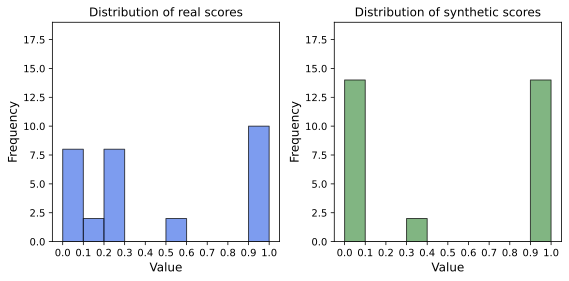

In [43]:
plot_scores(Q_metric_real,Q_metric_tvae)

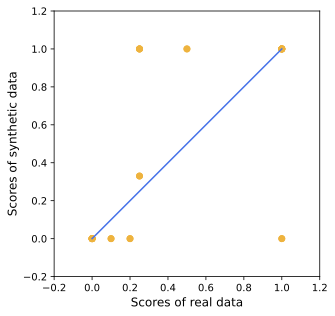

In [44]:
feature_pair_plot(Q_metric_real, Q_metric_tvae)

## Q_scores of synthetic data genearted by NextConvGen

In [45]:
Q_metric_nextconvgen = Q_metric(nextconvgen_syn_data, categorical_features)

Functional dependency: Feature_A -> Feature_B
Functional dependency: Feature_A -> Feature_C
Functional dependency: Feature_A -> Feature_E
Functional dependency: Feature_B -> Feature_A
Functional dependency: Feature_B -> Feature_C
Functional dependency: Feature_B -> Feature_E
Functional dependency: Feature_C -> Feature_E
Functional dependency: Feature_E -> Feature_C
There are some logical dependencies in the data.


KL Divergence score is: 1.6666668043422852e-10


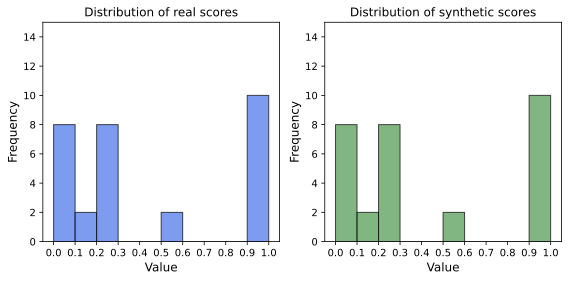

In [46]:
plot_scores(Q_metric_real,Q_metric_nextconvgen)

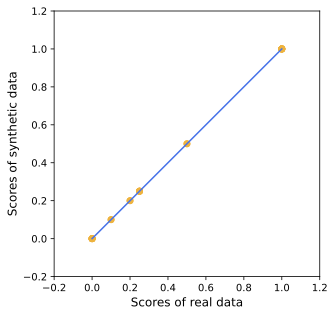

In [47]:
feature_pair_plot(Q_metric_real, Q_metric_nextconvgen)

## Q_scores of synthetic data genearted by TabDDPM

Q_metric_tabddpm = Q_metric(tabddpm_syn_data, categorical_features)

plot_scores(Q_metric_real,Q_metric_tabddpm)

feature_pair_plot(Q_metric_real, Q_metric_tabddpm)

## Q_scores of synthetic data genearted by TabuLa

In [48]:
Q_metric_tabula = Q_metric(tabula_syn_data, categorical_features)

Functional dependency: Feature_A -> Feature_B
Functional dependency: Feature_A -> Feature_C
Functional dependency: Feature_A -> Feature_E
Functional dependency: Feature_B -> Feature_A
Functional dependency: Feature_B -> Feature_C
Functional dependency: Feature_B -> Feature_E
Functional dependency: Feature_C -> Feature_E
Functional dependency: Feature_E -> Feature_C
There are some logical dependencies in the data.


KL Divergence score is: 1.6666668043422852e-10


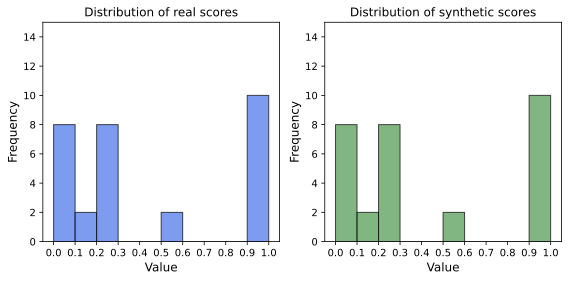

In [49]:
plot_scores(Q_metric_real,Q_metric_tabula)

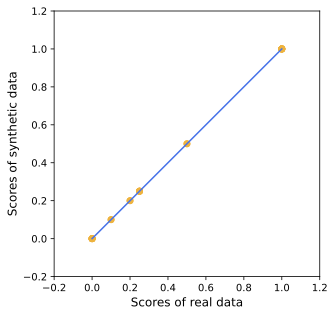

In [50]:
feature_pair_plot(Q_metric_real, Q_metric_tabula)

synthetic_data_lists = [Q_metric_ctgan, Q_metric_ctabgan, Q_metric_ctabgan_plus, Q_metric_tvae, Q_metric_nextconvgen, Q_metric_tabddpm,Q_metric_tabula]
feature_pair_plot_all(Q_metric_real, synthetic_data_lists)

## Q_scores of synthetic data genearted by GReaT

In [51]:
Q_metric_great = Q_metric(great_syn_data, categorical_features)

Functional dependency: Feature_A -> Feature_B
Functional dependency: Feature_A -> Feature_C
Functional dependency: Feature_A -> Feature_E
Functional dependency: Feature_B -> Feature_A
Functional dependency: Feature_B -> Feature_C
Functional dependency: Feature_B -> Feature_E
Functional dependency: Feature_C -> Feature_E
Functional dependency: Feature_E -> Feature_C
There are some logical dependencies in the data.


KL Divergence score is: 1.6666668043422852e-10


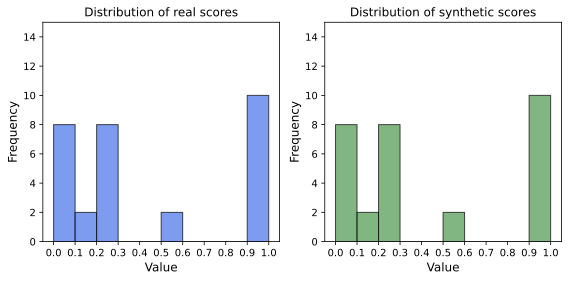

In [52]:
plot_scores(Q_metric_real,Q_metric_great)

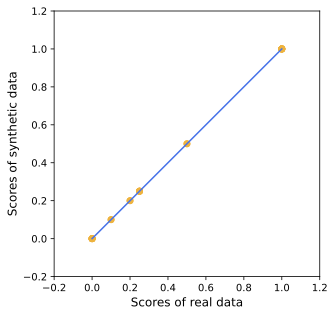

In [53]:
feature_pair_plot(Q_metric_real, Q_metric_great)

## Comparing logical dependencies of real and synthetic data

## CTGAN

In [54]:
df_zero_ctgan, df_one_ctgan, real_dependencies, total_count, ctgan_match = common_dependencies(data,ctgan_syn_data, categorical_features)

Total number of logical dependencies in real data are: 84
Total number of logical dependencies in synthetic data are: 84
The percentage of dependencies preserved in synthetic data is: 100.0


In [55]:
real_dependencies

,Feature1,Level1,Feature2,Level2,Probability
0,Feature_A,High,Feature_D,Med_B,0.0
1,Feature_A,High,Feature_D,Med_C,0.0
2,Feature_A,High,Feature_D,Med_E,0.0
3,Feature_A,Low,Feature_D,Med_C,0.0
4,Feature_A,Low,Feature_D,Med_D,0.0
...,...,...,...,...,...
79,Feature_E,present,Feature_B,class_0,0.0
80,Feature_E,absent,Feature_D,Med_C,0.0
81,Feature_E,absent,Feature_D,Med_D,0.0
82,Feature_E,absent,Feature_D,Med_E,0.0


In [56]:
real_dependencies[real_dependencies['Probability']==1.0]

,Feature1,Level1,Feature2,Level2,Probability
19,Feature_C,No,Feature_A,Low,1.0
22,Feature_C,No,Feature_B,class_0,1.0
32,Feature_D,Med_B,Feature_A,Low,1.0
36,Feature_D,Med_C,Feature_A,Normal,1.0
37,Feature_D,Med_D,Feature_A,High,1.0
42,Feature_D,Med_E,Feature_A,Normal,1.0
44,Feature_D,Med_B,Feature_B,class_0,1.0
48,Feature_D,Med_C,Feature_B,class_1,1.0
52,Feature_D,Med_D,Feature_B,class_2,1.0
54,Feature_D,Med_E,Feature_B,class_1,1.0


## CTABGAN+

In [57]:
df_zero_ctabgan_plus, df_one_ctabgan_plus, real_dependencies, total_count, ctabgan_plus_match = common_dependencies(data,ctabgan_plus_syn_data, categorical_features)

Total number of logical dependencies in real data are: 84
Total number of logical dependencies in synthetic data are: 84
The percentage of dependencies preserved in synthetic data is: 100.0


## TVAE

In [58]:
df_zero_tvae, df_one_tvae, real_dependencies, total_count, tvae_match = common_dependencies(data,tvae_syn_data, categorical_features)

Total number of logical dependencies in real data are: 84
Total number of logical dependencies in synthetic data are: 28
The percentage of dependencies preserved in synthetic data is: 33.33333333333333


In [59]:
df_one_tvae.shape

(12, 6)

## NextConvGen

In [60]:
df_zero_nextconvgen, df_one_nextconvgen, real_dependencies, total_count, nextconvgen_match = common_dependencies(data,nextconvgen_syn_data, categorical_features)

Total number of logical dependencies in real data are: 84
Total number of logical dependencies in synthetic data are: 84
The percentage of dependencies preserved in synthetic data is: 100.0


In [61]:
df_zero_nextconvgen.shape

(64, 6)

In [62]:
real_dependencies[real_dependencies['Probability']==1.0]

,Feature1,Level1,Feature2,Level2,Probability
19,Feature_C,No,Feature_A,Low,1.0
22,Feature_C,No,Feature_B,class_0,1.0
32,Feature_D,Med_B,Feature_A,Low,1.0
36,Feature_D,Med_C,Feature_A,Normal,1.0
37,Feature_D,Med_D,Feature_A,High,1.0
42,Feature_D,Med_E,Feature_A,Normal,1.0
44,Feature_D,Med_B,Feature_B,class_0,1.0
48,Feature_D,Med_C,Feature_B,class_1,1.0
52,Feature_D,Med_D,Feature_B,class_2,1.0
54,Feature_D,Med_E,Feature_B,class_1,1.0


## TabuLa

In [63]:
df_zero_tabula, df_one_tabula, real_dependencies, total_count, tabula_match = common_dependencies(data,tabula_syn_data, categorical_features)

Total number of logical dependencies in real data are: 84
Total number of logical dependencies in synthetic data are: 84
The percentage of dependencies preserved in synthetic data is: 100.0


## GReaT

In [64]:
df_zero_great, df_one_great, real_dependencies, total_count, great_match = common_dependencies(data,great_syn_data, categorical_features)

Total number of logical dependencies in real data are: 84
Total number of logical dependencies in synthetic data are: 84
The percentage of dependencies preserved in synthetic data is: 100.0
